In [ ]:
import csv
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time


def getSBD(sbd):
    if (sbd < 10):
        return f"02000{sbd}"
    elif (sbd < 100):
        return f"0200{sbd}"
    elif (sbd < 1000):
        return f"020{sbd}"
    else:
        return f"02{sbd}"


chrome_options = Options()
chrome_options.add_argument("--incognito")
chrome_options.add_argument("--window-size=1920x1080")
driver = webdriver.Chrome(options=chrome_options)
url = "http://bacninh.edu.vn/diem-thi-2022"

header = ['Số báo danh', 'Họ và tên', 'Ngày sinh', 'Trường', 'Điểm Khuyến khích', 'Ngữ Văn', 'Tiếng Anh', 'Toán Tự Luận',
          'Toán Trắc Nghiệm', 'Tổng toán', 'Môn Chuyên', 'Tổng Chuyên', 'Tổng đại trà']
employee_file = open('diem-thi.csv', mode='w',
                     encoding='utf-8-sig', newline='')
employee_writer = csv.writer(employee_file)
employee_writer.writerow(header)

driver.get(url)
time.sleep(1)

for i in range(876):
    sbd_field = driver.find_element(By.CSS_SELECTOR, 
        "#searchForm15 > input.search_init.text_filter.form-control.wp-100")
    sbd_field.send_keys(getSBD(i + 1))
    submit_button = driver.find_element(By.CSS_SELECTOR, '#searchForm15 > button')
    submit_button.click()
    row = []
    for index in range(13):
        sbd = driver.find_element(By.CSS_SELECTOR, 
            f'#module1015 > div.cont-dataset-detail > div.table-responsive > table > tbody > tr > td:nth-child({index + 1})')
        try:
            row.append(sbd.text)
        except:
            sbd = driver.find_element(By.CSS_SELECTOR, 
                f'#module1015 > div.cont-dataset-detail > div.table-responsive > table > tbody > tr > td:nth-child({index + 1})')
            try:
                print(f"Try again at {getSBD(i + 1)} with field {index + 1}")
                row.append(sbd.text)
            except:
                row.append("")
                print(f"error at {getSBD(i + 1)} with field {index + 1}")
    employee_writer.writerow(row)

    sbd_field.clear()
employee_file.close()


Số người trên 40.1 (điểm thường) : 252


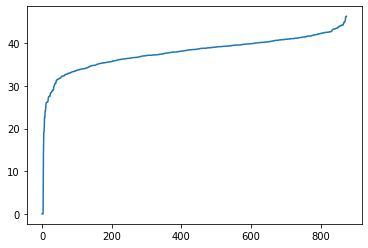

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


def computeTicks (x, step = 5):
    """
    Computes domain with given step encompassing series x
    @ params
    x    - Required - A list-like object of integers or floats
    step - Optional - Tick frequency
    """
    xMax, xMin = math.ceil(max(x)), math.floor(min(x))
    dMax, dMin = xMax + abs((xMax % step) - step) + (step if (xMax % step != 0) else 0), xMin - abs((xMin % step))
    return range(dMin, dMax, step)


dataframe = pd.read_csv("diem-thi.csv")
dataframe = dataframe.sort_values("Tổng đại trà")
tdt = dataframe.get("Tổng đại trà")
tdt = list(filter(lambda x: (x != '' and x != '.'), tdt))
y = [float(x) for x in tdt]
x = np.arange(0, len(y))
    
plt.plot(x, y)

plt.show()

print(f"Số người trên 40.1 (điểm thường) : {len([1 for i in y if i > 40.1])}")

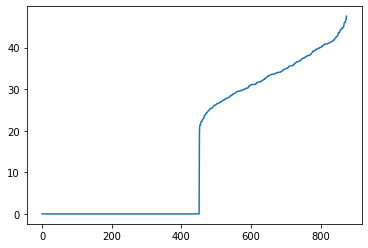

Số người trên 34.3 điểm chuyên : 185


In [105]:
dataframe = dataframe.sort_values("Tổng Chuyên")
tdt = dataframe.get("Tổng Chuyên")
tdt = list(filter(lambda x: (x != '' and x != '.'), tdt))
y = [float(x) for x in tdt]
x = np.arange(0, len(y))
plt.plot(x, y)
plt.show() 
print(f"Số người trên 34.3 điểm chuyên : {len([1 for i in y if i > 34.3])}")